# Lithuania COVID analysis

I got task to create graph that shows the dynamics of new COVID cases in Lithuania in time (incidence time series) in such age groups: 0-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90+. I had to use moving averages for rendering (Assign the average of the last 14 days to a specific day). Show Lithuanian months on the axis of time Names. Provide a legend (information box) explaining the colors/names of groups.

In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import pylab as pl
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import matplotlib as mpl
from scipy import stats
import seaborn as sns
import locale
locale.setlocale(locale.LC_ALL, 'Spanish_Spain.1252')
import datetime
import pandas as pd
import ipywidgets as widgets
import plotly.graph_objects as go
from IPython.display import display
from sklearn import preprocessing

In [8]:
df = pd.read_csv('covid_cases_opendata.csv', encoding = "utf-8", sep=";")

In [9]:
df.columns

Index(['object_id', 'case_code', 'confirmati', 'municipali', 'municipa_1',
       'age_bracke', 'gender'],
      dtype='object')

In [10]:
len(df)

187991

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187991 entries, 0 to 187990
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   object_id   187991 non-null  int64 
 1   case_code   187991 non-null  object
 2   confirmati  187991 non-null  object
 3   municipali  187991 non-null  object
 4   municipa_1  187991 non-null  object
 5   age_bracke  187991 non-null  object
 6   gender      187991 non-null  object
dtypes: int64(1), object(6)
memory usage: 10.0+ MB


In [12]:
df.head()

,object_id,case_code,confirmati,municipali,municipa_1,age_bracke,gender
0,91038,357bd6a710733ff7449afca5719f0d147eecc383946761...,2021.02.06 00:00:00,13,Vilniaus m. sav.,20-29,Moteris
1,91039,ea7d07493157c9156a6cb744cf87124cdde94836f50417...,2021.02.06 00:00:00,13,Vilniaus m. sav.,0-9,Vyras
2,91040,57958d08dd662684140b1f0c79cad2d64475ecef4e55ac...,2021.02.06 00:00:00,13,Vilniaus m. sav.,50-59,Vyras
3,91041,63c621502cbc64b5c49d68602dcd5d76bd53ebaf983f09...,2021.02.06 00:00:00,94,Jurbarko r. sav.,40-49,Moteris
4,91042,a96956ee1dc38d67200a9aa3c89c4cdb98600757bb8662...,2021.02.06 00:00:00,13,Vilniaus m. sav.,50-59,Moteris


In [46]:
df.age_bracke.value_counts()

50-59          39160
40-49          32726
30-39          31017
60-69          25511
20-29          24833
70-79          10750
Virš 80         9479
10-19           8808
0-9             5338
nenustatyta      369
Name: age_bracke, dtype: int64

In [14]:
df['confirmati'] = pd.to_datetime(df['confirmati']) #changing date formatting

In [33]:
df.head()

,object_id,case_code,confirmati,municipali,municipa_1,age_bracke,gender
0,91038,357bd6a710733ff7449afca5719f0d147eecc383946761...,2021-02-06,13,Vilniaus m. sav.,20-29,Moteris
1,91039,ea7d07493157c9156a6cb744cf87124cdde94836f50417...,2021-02-06,13,Vilniaus m. sav.,0-9,Vyras
2,91040,57958d08dd662684140b1f0c79cad2d64475ecef4e55ac...,2021-02-06,13,Vilniaus m. sav.,50-59,Vyras
3,91041,63c621502cbc64b5c49d68602dcd5d76bd53ebaf983f09...,2021-02-06,94,Jurbarko r. sav.,40-49,Moteris
4,91042,a96956ee1dc38d67200a9aa3c89c4cdb98600757bb8662...,2021-02-06,13,Vilniaus m. sav.,50-59,Moteris


In [34]:
df_grouped= df.groupby(['confirmati','age_bracke'],as_index=False)[['object_id']].count() #creating a new df for required graph.

In [35]:
df_grouped['14day_rolling_avg'] = df_grouped.object_id.rolling(14).mean() # creating new column with 14 days rolling average.

In [43]:
df_grouped.to_csv('grouped_data.csv')

In [36]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2408 entries, 0 to 2407
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   confirmati         2408 non-null   datetime64[ns]
 1   age_bracke         2408 non-null   object        
 2   object_id          2408 non-null   int64         
 3   14day_rolling_avg  2395 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 75.4+ KB


In [60]:
plt.rcParams["figure.figsize"] #for figure size

[20.0, 10.0]

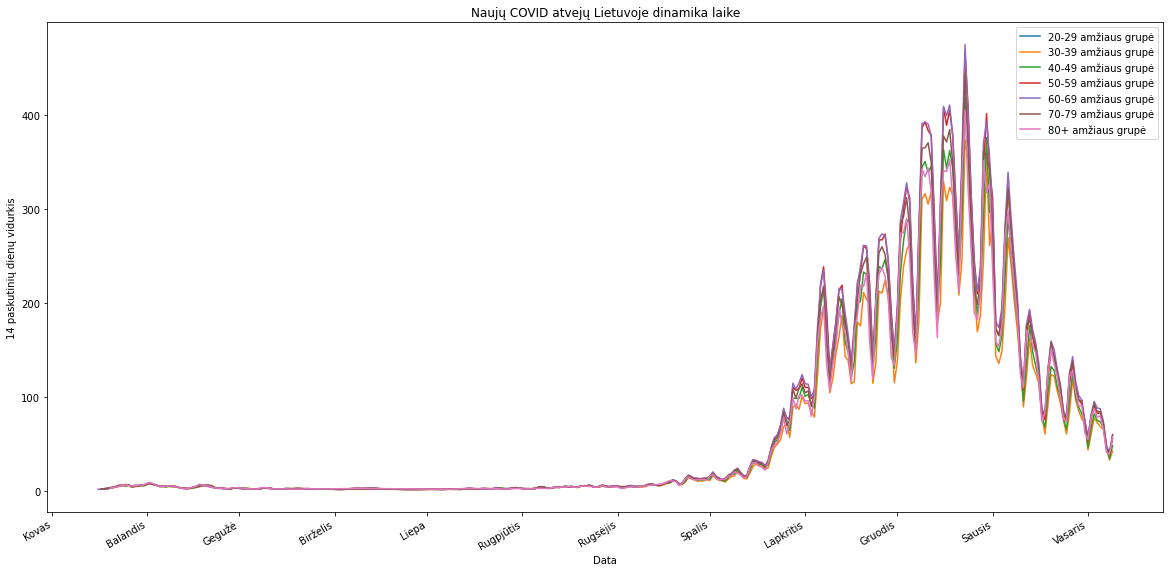

In [66]:
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from matplotlib.dates import num2date
from matplotlib.ticker import FuncFormatter

months_names = [None, 'Sausis', 'Vasaris', 'Kovas','Balandis', 'Gegužė', 'Birželis', 'Liepa', 'Rugpjūtis', 'Rugsėjis', 'Spalis', 'Lapkritis', 'Gruodis']


# Set the locator
locator = mdates.MonthLocator()  # every January and April



plt.figure
plt.rcParams["figure.figsize"] = (20,10)
axes=df_grouped.loc[df_grouped.sort_values('14day_rolling_avg').plot('confirmati','14day_rolling_avg', label= '20-29 amžiaus grupė')
df_grouped.loc[df_grouped['age_bracke']=='30-39'].sort_values('14day_rolling_avg').plot('confirmati','14day_rolling_avg',ax=axes,label='30-39 amžiaus grupė')
df_grouped.loc[df_grouped['age_bracke']=='40-49'].sort_values('14day_rolling_avg').plot('confirmati','14day_rolling_avg',ax=axes,label='40-49 amžiaus grupė')
df_grouped.loc[df_grouped['age_bracke']=='50-59'].sort_values('14day_rolling_avg').plot('confirmati','14day_rolling_avg',ax=axes,label='50-59 amžiaus grupė')
df_grouped.loc[df_grouped['age_bracke']=='60-69'].sort_values('14day_rolling_avg').plot('confirmati','14day_rolling_avg',ax=axes, label= '60-69 amžiaus grupė')
df_grouped.loc[df_grouped['age_bracke']=='70-79'].sort_values('14day_rolling_avg').plot('confirmati','14day_rolling_avg',ax=axes,label='70-79 amžiaus grupė')
df_grouped.loc[df_grouped['age_bracke']=='Virš 80'].sort_values('14day_rolling_avg').plot('confirmati','14day_rolling_avg',ax=axes,label='80+ amžiaus grupė')



plt.ylabel('14 paskutinių dienų vidurkis')
plt.xlabel('Data')
plt.title('Naujų COVID atvejų Lietuvoje dinamika laike')
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(FuncFormatter(lambda x, i: months_names[num2date(x).month]))